### Make sure you have executed `appium` command in terminal to start appium server

In [1]:
from logging import Logger
from os.path import isfile
from pathlib import Path
from subprocess import Popen
from os import environ
import pytest
from appium import webdriver
from devtools_ai.appium import SmartDriver

In [2]:
from logging import Logger
from time import sleep
from typing import Final
import pytest
from appium.webdriver import WebElement
from devtools_ai.appium import SmartDriver
from appium.webdriver.common.mobileby import MobileBy
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
# TODO put this in some library
def is_blank (myString):
    return not (myString and myString.strip())

def is_not_blank (myString):
    return bool(myString and myString.strip())

In [4]:
%pwd

'/Users/gp/Dropbox/projects/qa_scenarios/test/test_mobile/test_mob_testing'

In [5]:
%cd './../../../'

/Users/gp/Dropbox/projects/qa_scenarios


In [6]:
%pwd

'/Users/gp/Dropbox/projects/qa_scenarios'

In [7]:
from helpers.cmd_helper import get_android_adb_device
from constants import devtools_api_key
from helpers.annotation_helpers import drive_smartly

In [8]:
current_folder = globals()['_dh'][0]
current_folder

PosixPath('/Users/gp/Dropbox/projects/qa_scenarios/test/test_mobile/test_mob_testing')

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [10]:
from random import randint

In [11]:
randint(0, 4)

4

### Playing with boxes

In [12]:
# rect_orig = Rectangle((1, 1), 2, 6, linewidth=1, edgecolor='b', facecolor='#0bba', label='orig')
# rect_new = Rectangle((2, 2), 3, 2, linewidth=1, edgecolor='b', facecolor='#fbba', label='new')

In [13]:
def get_random_rect(xbounds = [0, 10], ybounds = [0, 10], facecolor='#fffa', label='please fill label'):
    min_x, max_x = xbounds
    min_y, max_y = ybounds

    start_x = randint(min_x, max_x-1)
    start_x

    start_y = randint(min_y, max_y-1)
    start_y

    width = randint(1, max_x - start_x)
    height = randint(1, max_y - start_y)
    
    return Rectangle((start_x, start_y), width, height, linewidth=1, edgecolor='b', facecolor=facecolor, label=label)

In [14]:
def is_falling_on_top(rect_orig: Rectangle, rect_new: Rectangle):
    left_dist = rect_orig.get_x() + rect_orig.get_width() - rect_new.get_x()
    right_dist = rect_new.get_x() + rect_new.get_width() - rect_orig.get_x()
    top_dist = rect_orig.get_y() + rect_orig.get_height() - rect_new.get_y()
    bottom_dist = rect_new.get_y() + rect_new.get_height() - rect_orig.get_y()
    
    return all([cur_dist > 0 for cur_dist in [left_dist, right_dist, top_dist, bottom_dist]])

In [15]:
def get_overlapping_rectangle(rect_orig: Rectangle, rect_new: Rectangle, facecolor='#0000', label='overlapping'):
    top_left_x = max(rect_orig.get_x(), rect_new.get_x())
    top_left_x

    top_right_x = min(rect_new.get_x() + rect_new.get_width(), rect_orig.get_x() + rect_orig.get_width())
    top_right_x

    top_left_y = max(rect_orig.get_y(), rect_new.get_y())
    top_left_y

    bottom_left_y = min(rect_new.get_y() + rect_new.get_height(), rect_orig.get_y() + rect_orig.get_height())
    bottom_left_y

    cur_width = top_right_x - top_left_x
    assert cur_width > 0

    cur_height = bottom_left_y - top_left_y
    assert cur_height > 0
    
    return Rectangle((top_left_x, top_left_y), cur_width, cur_height, linewidth=1, edgecolor='r', facecolor=facecolor, label=label)

In [16]:
min_x, max_x = [0, 10]
min_y, max_y = [0, 10]

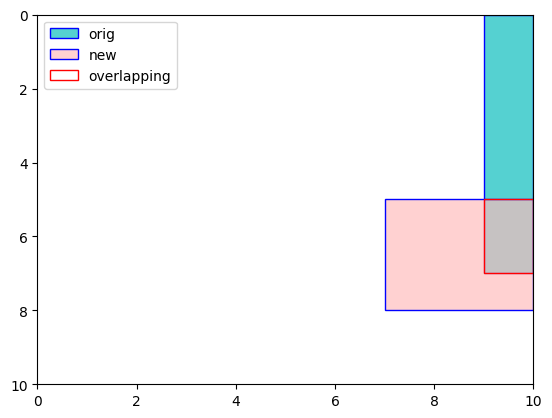

array([[ 9.,  5.],
       [10.,  5.],
       [10.,  7.],
       [ 9.,  7.]])

In [47]:
fig, ax = plt.subplots()
ax.plot([0,],[0,]) #simply in order to render the box

rect_orig = get_random_rect(xbounds = [min_x, max_x], ybounds = [min_y, max_y], facecolor='#0bba', label='orig')
rect_new = get_random_rect(xbounds = [min_x, max_x], ybounds = [min_y, max_y], facecolor='#fbba', label='new')

ax.add_patch(rect_orig)
ax.add_patch(rect_new)

if is_falling_on_top(rect_orig, rect_new):
    rect_overlap = get_overlapping_rectangle(rect_orig=rect_orig, rect_new=rect_new)
    ax.add_patch(rect_overlap)
else:
    rect_overlap = None
    print('NOT overlapping')


plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)

plt.gca().invert_yaxis()

handles = [rect_orig,rect_new]
if rect_overlap is not None:
    handles += [rect_overlap]
    
plt.legend(handles=handles)

plt.show()

rect_overlap.get_corners() if rect_overlap is not None else None

# MAIN

In [9]:
apk_path = (Path(current_folder) / Path("apps/android/todo_immr_resource_ids.apk")).resolve()
assert isfile(apk_path), f"apk path should be a valid file, currently is {apk_path}"

In [10]:
desired_caps = {
    "platformName": "Android",
    "deviceName": get_android_adb_device(),
    "appPackage": 'com.immr.immrtodolist',
    "app": str(apk_path),
    "automationName": "UiAutomator2",
    "newCommandTimeout": 86400, #timeout after 1 day
}
desired_caps

{'platformName': 'Android',
 'deviceName': 'fee361e0',
 'appPackage': 'com.immr.immrtodolist',
 'app': '/Users/gp/Dropbox/projects/qa_scenarios/test/test_mobile/test_mob_testing/apps/android/todo_immr_resource_ids.apk',
 'automationName': 'UiAutomator2',
 'newCommandTimeout': 86400}

In [11]:
driver = webdriver.Remote('http://127.0.0.1:4723/wd/hub', desired_caps)
driver.implicitly_wait(5*60) #5 minutes

In [12]:
button = WebDriverWait(driver, 10).until(EC.visibility_of_element_located(
        [MobileBy.ID, 'btnAddNotes']))
button

<appium.webdriver.webelement.WebElement (session="8d56e022-3135-4b11-805e-e22a2cea7341", element="00000000-0000-10a3-ffff-ffff00000015")>

In [13]:
elems = driver.find_elements(MobileBy.XPATH, './/*')

In [14]:
#driver.quit()

In [15]:
len(elems)

11

In [16]:
[attr for attr in dir(driver) if attr.startswith('get')]

['get',
 'get_clipboard',
 'get_clipboard_text',
 'get_cookie',
 'get_cookies',
 'get_credentials',
 'get_device_time',
 'get_display_density',
 'get_events',
 'get_images_similarity',
 'get_log',
 'get_performance_data',
 'get_performance_data_types',
 'get_pinned_scripts',
 'get_screenshot_as_base64',
 'get_screenshot_as_file',
 'get_screenshot_as_png',
 'get_settings',
 'get_system_bars',
 'get_window_position',
 'get_window_rect',
 'get_window_size']

In [18]:
# elem.is_displayed(), elem.is_enabled(), elem.is_selected()

In [19]:
for ii, elem in enumerate(elems):
    print(ii, elem.text, elem.get_attribute('clickable'), elem.is_displayed())

0  false True
1  false True
2  false True
3  false True
4  false True
5  false True
6 ImmrTodoList false True
7  false True
8  false True
9  false True
10 TAMMBAH true True


In [20]:
def get_displayed_leafs():
    # https://stackoverflow.com/a/3926682/720484
    leafs = driver.find_elements(MobileBy.XPATH, '//*[not(*)]')
    displayed_leafs = [elem for elem in leafs if elem.is_displayed()]
    for ii, elem in enumerate(displayed_leafs):
        rect = elem.rect
        size = elem.size
        assert rect['height'] == size['height'] and rect['width'] == size['width']
        loc = elem.location
        assert rect['x'] == loc['x'] and rect['y'] == loc['y']
        elem.area = size['height'] * size['width']
        elem.box = [loc, {'x': loc['x'] + size['width'], 'y': loc['y'] + size['height']}]
    return displayed_leafs

In [21]:
leafs = get_displayed_leafs()
len(leafs)

3

In [27]:
for ii, elem in enumerate(leafs):
    print(ii, elem.text, elem.get_attribute('clickable'), elem.area, elem.box,
          elem.get_attribute('resource-id'),
          elem.get_attribute('name'))

0 ImmrTodoList false 37312 [{'x': 48, 'y': 149}, {'x': 472, 'y': 237}] None ImmrTodoList
1  false 1699368 [{'x': 48, 'y': 307}, {'x': 1032, 'y': 2034}] com.immr.immrtodolist:id/rvNotes 
2 TAMMBAH true 106272 [{'x': 48, 'y': 2064}, {'x': 1032, 'y': 2172}] com.immr.immrtodolist:id/btnAddNotes TAMMBAH


In [36]:
def derive_id(elem: WebElement):
    rsrc_id = elem.get_attribute('resource-id')
    if is_not_blank(rsrc_id):
        return rsrc_id
    

In [23]:
elem = leafs[1]
elem.text

''

In [24]:
elem.get_attribute('resource-id')

'com.immr.immrtodolist:id/rvNotes'

In [25]:
elem.get_attribute('name')

''

In [26]:
assert elem.location == elem.location_in_view, 'up until now we have that these two are the same, if this is not true we should learn about it'

In [66]:
elem.size

{'height': 1727, 'width': 984}

In [67]:
elem.box

[{'x': 48, 'y': 307}, {'x': 1032, 'y': 2034}]

In [69]:
elem.rect['height']

1727

In [53]:
dir(elem)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_execute',
 '_id',
 '_parent',
 '_upload',
 'accessible_name',
 'area',
 'aria_role',
 'box',
 'clear',
 'click',
 'find_element',
 'find_element_by_class_name',
 'find_element_by_css_selector',
 'find_element_by_id',
 'find_element_by_link_text',
 'find_element_by_name',
 'find_element_by_partial_link_text',
 'find_element_by_tag_name',
 'find_element_by_xpath',
 'find_elements',
 'find_elements_by_class_name',
 'find_elements_by_css_selector',
 'find_elements_by_id',
 'find_elements_by_link_text',
 'find_elements_by_name',
 'find_elements_by_partial_link_text',


In [26]:
# elem.click()

In [48]:
leafs = driver.find_elements(MobileBy.XPATH, '//*[not(*)]')
len(leafs)

7

In [62]:
for ii, elem in enumerate(leafs):
    print(ii, elem.text, elem.get_attribute('clickable'), elem.is_displayed())

0 ImmrTodoList false True
1 Masukkan Judul true True
2  false True
3 Masukkan Deskripsi true True
4  false True
5  false True
6 SIMPAN true True


In [64]:
elem.text

'SIMPAN'

In [55]:
[attr for attr in dir(elem) if attr.startswith('get')]

['get_attribute', 'get_dom_attribute', 'get_property']

Message: 'id' attribute is unknown for the element. Only the following attributes are supported: [checkable, checked, {class,className}, clickable, {content-desc,contentDescription}, enabled, focusable, focused, {long-clickable,longClickable}, package, password, {resource-id,resourceId}, scrollable, selection-start, selection-end, selected, {text,name}, bounds, displayed, contentSize]

In [44]:
elem.get_attribute('name')

'TAMMBAH'

In [58]:
elem.get_attribute('resource-id')

'com.immr.immrtodolist:id/btnAdd'

In [59]:
elem.size

{'height': 144, 'width': 984}

In [65]:
elem = leafs[1]
elem.text

'Masukkan Judul'

AttributeError: 'WebElement' object has no attribute 'area'

In [67]:
elem.size

{'height': 145, 'width': 984}

In [68]:
cur_size = elem.size
cur_size

{'height': 145, 'width': 984}

142680

In [75]:
elems = get_displayed_leafs()
len(elems)

7

In [76]:
for elem in elems:
    print(elem.get_attribute('resource-id'), elem.text, elem.area)

None ImmrTodoList 37312
com.immr.immrtodolist:id/inputTitle Masukkan Judul 142680
com.immr.immrtodolist:id/text_input_end_icon  20736
com.immr.immrtodolist:id/inputDesc Masukkan Deskripsi 256824
com.immr.immrtodolist:id/text_input_end_icon  20736
com.immr.immrtodolist:id/takeImage  360000
com.immr.immrtodolist:id/btnAdd SIMPAN 141696


In [77]:
elems[2].size

{'height': 144, 'width': 144}

In [78]:
total_area = sum([elem.area for elem in elems])
total_area

979984

In [79]:
driver.quit()